Contoh Dataset:
  kelas bentuk-topi permukaan-topi warna-topi memar bau lampiran-insang  \
0     p           x              s          n     t   p               f   
1     e           x              s          y     t   a               f   
2     e           b              s          w     t   l               f   
3     p           x              y          w     t   p               f   
4     e           x              s          g     f   n               f   

  jarak-insang ukuran-insang warna-insang  ... permukaan-bawah-cincin  \
0            c             n            k  ...                      s   
1            c             b            k  ...                      s   
2            c             b            n  ...                      s   
3            c             n            n  ...                      s   
4            w             b            k  ...                      s   

  warna-atas-cincin warna-bawah-cincin jenis-selubung warna-selubung  \
0                 w   

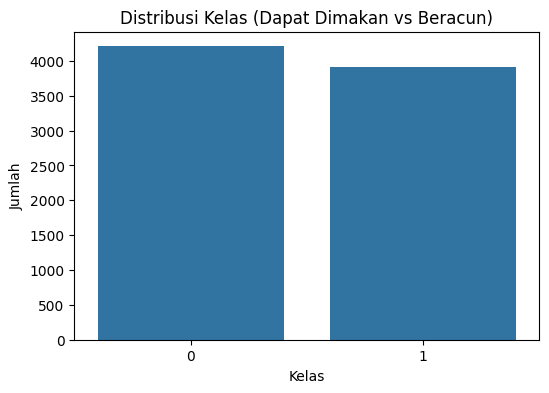


Analisis Selesai! Silakan modifikasi kode ini untuk eksplorasi lebih lanjut.


In [ ]:
# Klasifikasi Jamur dengan Machine Learning
# =========================================

# 1. Import Library
# Mengimpor library yang diperlukan untuk analisis dan pembuatan model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 2. Memuat Dataset
# URL dataset dari UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
kolom = ['kelas', 'bentuk-topi', 'permukaan-topi', 'warna-topi', 'memar', 'bau',
         'lampiran-insang', 'jarak-insang', 'ukuran-insang', 'warna-insang',
         'bentuk-batang', 'akar-batang', 'permukaan-atas-cincin',
         'permukaan-bawah-cincin', 'warna-atas-cincin', 'warna-bawah-cincin',
         'jenis-selubung', 'warna-selubung', 'jumlah-cincin', 'tipe-cincin',
         'warna-cetakan-spora', 'populasi', 'habitat']

# Memuat dataset dan memberi nama kolom
data = pd.read_csv(url, header=None, names=kolom)

# Menampilkan contoh data
print("Contoh Dataset:")
print(data.head())

# 3. Eksplorasi Data
print("\nInformasi Dataset:")
print(data.info())
print("\nDistribusi Kelas (Dapat Dimakan vs Beracun):")
print(data['kelas'].value_counts())

# 4. Preprocessing Data
# Mengubah fitur kategori menjadi numerik menggunakan LabelEncoder
encoder = LabelEncoder()
for kolom in data.columns:
    data[kolom] = encoder.fit_transform(data[kolom])

# Memeriksa apakah ada missing values
print("\nCek Missing Values:")
print(data.isnull().sum())

# Memisahkan fitur (X) dan target (y)
X = data.drop('kelas', axis=1)
y = data['kelas']

# Membagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Melatih Model
# Model Support Vector Machine (SVM)
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
prediksi_svm = model_svm.predict(X_test)

# Model K-Nearest Neighbors (K-NN)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
prediksi_knn = model_knn.predict(X_test)

# 6. Evaluasi Model
# Evaluasi untuk model SVM
print("\nEvaluasi Model SVM:")
print("Akurasi:", accuracy_score(y_test, prediksi_svm))
print("Laporan Klasifikasi:\n", classification_report(y_test, prediksi_svm))

# Evaluasi untuk model K-NN
print("\nEvaluasi Model K-NN:")
print("Akurasi:", accuracy_score(y_test, prediksi_knn))
print("Laporan Klasifikasi:\n", classification_report(y_test, prediksi_knn))

# 7. Visualisasi Hasil
# Membuat grafik distribusi kelas
plt.figure(figsize=(6, 4))
sns.countplot(x='kelas', data=data)
plt.title('Distribusi Kelas (Dapat Dimakan vs Beracun)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

print("\nAnalisis Selesai!")
